# CW1 - Student no: 18001024


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Imports

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch

%matplotlib inline

## Dataset Loading Functions

In [4]:
def load_iris_dataset():
    Y_iris_train = np.load('/content/drive/My Drive/Datasets/Datasets/IRIS/iris_train_labels.npy')
    X_iris_train = np.load('/content/drive/My Drive/Datasets/Datasets/IRIS/iris_train_samples.npy')
    Y_iris_val = np.load('/content/drive/My Drive/Datasets/Datasets/IRIS/iris_val_labels.npy')
    X_iris_val = np.load('/content/drive/My Drive/Datasets/Datasets/IRIS/iris_val_samples.npy')

    return X_iris_train, X_iris_val, Y_iris_train, Y_iris_val

def load_mnist_dataset():
    Y_mnist_train = np.load('/content/drive/My Drive/Datasets/Datasets/MNIST/mnist_train_labels.npy')
    X_mnist_train = np.load('/content/drive/My Drive/Datasets/Datasets/MNIST/mnist_train_samples.npy')
    Y_mnist_val = np.load('/content/drive/My Drive/Datasets/Datasets/MNIST/mnist_val_labels.npy')
    X_mnist_val = np.load('/content/drive/My Drive/Datasets/Datasets/MNIST/mnist_val_samples.npy')

    return X_mnist_train, X_mnist_val, Y_mnist_train, Y_mnist_val

In [5]:
X_iris_train, X_iris_val, Y_iris_train, Y_iris_val = load_iris_dataset()
X_mnist_train, X_mnist_val, Y_mnist_train, Y_mnist_val = load_mnist_dataset()

## Questions

## Line Fitting (10 points)

**Question 1a: Implement the normal equation solver function nsolve, which takes as input the matrix X and the target vector y and returns the optimized weights w. (5 points)**

In [6]:
# Having a look at the data
print(Y_iris_train.shape)
print(X_iris_train.shape)

print(Y_iris_val.shape)
print(X_iris_val.shape)

print(Y_mnist_train.shape)
print(X_mnist_train.shape)

print(Y_mnist_val.shape)
print(X_mnist_val.shape)

(96,)
(96, 4)
(15,)
(15, 4)
(44800,)
(44800, 784)
(7000,)
(7000, 784)


In [7]:
# Normal equation solver that takes matrix X and target vector y and returns the optimized weights
def nsolve(X, y):
    inverse = np.linalg.pinv(X.transpose() @ X)
    W_opt = inverse @ X.transpose() @ y
    return W_opt

**Question 1b: Implement lineFit(X,y) which should fit a linear function to the input data. Test your implementation on the following task: predict with linear fitting the petal length (cm) of the Iris dataset using the three remaining variables as inputs (sepal length (cm), sepal width (cm) and petal width (cm)). Report the L2 loss on the validation set and plot a graph showing the correlation between y and your prediction on the validation set (2 points)**

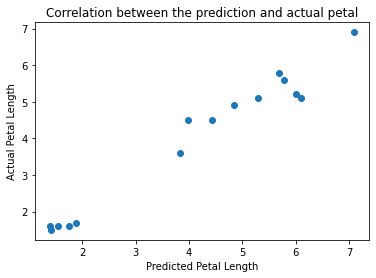

L2 Loss is: 0.14800261232027576


In [8]:
# Linear fit, fits a linear line to the input data

def lineFit(X, y):
    X_aug = augmentMatrix(X)
    W_opt = nsolve(X_aug,y)
    return W_opt

def augmentMatrix(X):
    bias = np.ones((X.shape[0], 1), dtype=X.dtype) # this is to train b/c
    X_augmented_train = np.hstack((X, bias))
    return X_augmented_train

def test_lineFit(X, W):
    # new y vector
    X_aug = augmentMatrix(X)
    y = X_aug[:,2]
    new_X = X_aug
    new_X = np.delete(new_X, 2, axis=1)

    yPredict = new_X @ W
    plot_prediction(yPredict, y)
    loss = l2_loss(yPredict, y)
    print(f"L2 Loss is: {loss}")

def l2_loss(yPredict, yActual):
    n = len(yPredict)
    vector_loss = (1/n) * np.sum(np.square(yPredict - yActual))
    return vector_loss

def plot_prediction(yPredict, yActual):
    plt.scatter(yPredict, yActual)
    plt.xlabel('Predicted Petal Length')
    plt.ylabel('Actual Petal Length')
    plt.title('Correlation between the prediction and actual petal')
    plt.show()

# Reduce for training
y_petal_train = X_iris_train[:,2]
x_petal_train = X_iris_train
x_petal_train = np.delete(x_petal_train, 2, axis=1)

weights = lineFit(x_petal_train, y_petal_train)
test_lineFit(X_iris_val, weights)

***Question 1c: Implement polyFit(X,y) which should fit a 2 nd degree polynomial to the input data. Test your implementation on the following task: predict with the polynomial the petal width (cm) of the Iris dataset using the three remaining variables as inputs (sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)). The 2 nd degree polynomial should consider all possible pairwise terms, i.e. w 1 x 2 + w 2 xy + w 3 y 2 + w 4 x + w 5 y + w 6 in the case of two input variables x and y. Report the L2 loss on the validation set and plot a graph showing the correlation between y and your prediction on the validation set (3 points)***

[-1.1598299  -1.1598299  -1.1598299   0.63452087  0.78425587  0.49993117
 -0.07611716 -0.08181011  0.00694009]


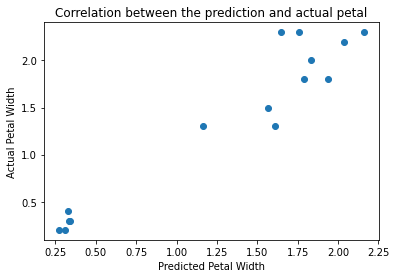

L2 Loss is: 0.06361173305051351


In [9]:
from numpy import matmul
from numpy.linalg import inv
from numpy.random import rand

def plot_poly_prediction(yPredict, yActual):
    plt.scatter(yPredict, yActual)
    plt.xlabel('Predicted Petal Width')
    plt.ylabel('Actual Petal Width')
    plt.title('Correlation between the prediction and actual petal')
    plt.show()

def polyFit(X,y):
    # this should get the pair wise polynomials
    x_1 = np.ones(X.shape)
    x_squared = X ** 2
    X_stacked = np.column_stack([x_1, X, x_squared])
    W_opt_star = nsolve(X_stacked, y)

    return W_opt_star

def test_polyFit(X, W):
    y = X[:,3]
    new_X = X
    new_X = np.delete(new_X, 3, axis=1)

    x_1 = np.ones(new_X.shape)
    x_squared = new_X ** 2
    X_stacked = np.column_stack([x_1, new_X, x_squared])

    poly_Y = X_stacked @ W
    plot_poly_prediction(poly_Y, y)
    loss = l2_loss(poly_Y, y)
    print(f"L2 Loss is: {loss}")

# Reduce for training
y_petal_train = X_iris_train[:,3]
x_petal_train = X_iris_train
x_petal_train = np.delete(x_petal_train, 3, axis=1)

weights = polyFit(x_petal_train, y_petal_train)
print(weights)
test_polyFit(X_iris_val, weights)

## Clustering (14 points)


***Question 2a: Implement a function pca(X, ndims) that performs PCA over the input data X and returns both the
mean vector X̄ and the ndims top components. The top components are the eigen vectors linked to
the top eigen values computed from the covariance matrix. Try your function on the MNIST dataset,
which is composed of 10 digit classes. Display the top 10 components fitted on the train dataset as
images and check that you can reconstruct perfectly an input digit from the validation set using all
components (7 points)***

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at  /pytorch/aten/src/ATen/native/Copy.cpp:162.)


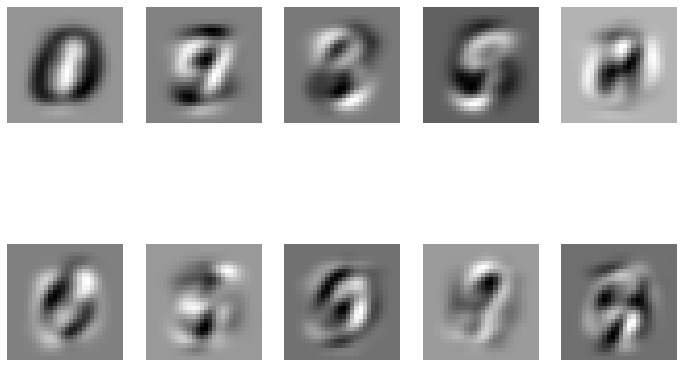

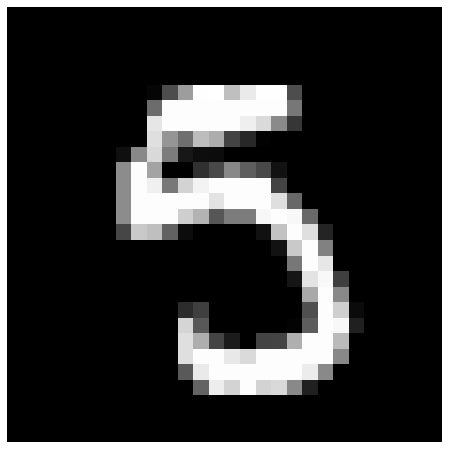

In [10]:
# Perform dimensionality reduction on X using Principle component analysis
def get_top_k_components(eigenVectors, k):
  # get indices of largest 10 eigen values
  # return the eigenvectors that correspond to these indices)
    return eigenVectors[0:k]

def pca(X, ndims):
  # return mean vector X_mean and ndims top components
    X_mean = np.mean(X, axis=0)
    centered_X_mean = X - X_mean
    covariance_X = np.cov(centered_X_mean.T)
    values, vectors = np.linalg.eig(covariance_X)

    # sort eigenvectors
    vectors = vectors.T
    idxs = np.argsort(values)[::-1]
    values = values[idxs]
    vectors = vectors[idxs]

    return X_mean, vectors

def project_pca(X, X_mean, components):
    X = X - X_mean
    return np.dot(X, components.T)

def reconstruct(projected, mean_vector, components):
    validation_X = np.dot(projected, components)
    validation_X = validation_X + mean_vector
    return validation_X

def test_pca(X_mean, eigenVectors, ndims=None):
    #X_mean, eigenVectors = pca(X_mnist_train, ndims)
    n_components = get_top_k_components(eigenVectors, 10)
    display_mnist(n_components)

def test_pca_on_val(eigenVectors, mean, X):
    n_components = get_top_k_components(eigenVectors, 784)
    projected = project_pca(X, mean, n_components)
    reconstructed_X = reconstruct(projected, mean, n_components)
    dispay_val_mnist(reconstructed_X[0])

def display_mnist(sample):
    # have to conver to torch so you can draw
    sample = torch.tensor(sample, dtype=torch.float32)
    plt.figure(figsize=(12,8))
    length = sample.shape[0]
    for i in range(length):
    ax = plt.subplot(2,5,i+1)
    ax.imshow((sample[i]).view(28,28).detach().cpu().numpy(), cmap="gray")
    plt.axis('off')
    plt.show()

def dispay_val_mnist(sample):
    sample = torch.tensor(sample, dtype=torch.float32)
    plt.figure(figsize=(12,8))
    ax = plt.subplot(1,1,1)
    ax.imshow((sample).view(28,28).detach().cpu().numpy(), cmap="gray")
    plt.axis('off')
    plt.show()

X_mean, vectors = pca(X_mnist_train, ndims=None)
test_pca(X_mean, vectors, ndims=None)

# test on vectors given from the pca
test_pca_on_val(vectors, X_mean, X_mnist_val)

***Question 2b: Perform independent research on the clustering algorithm k-means. Implement a function kmeans
performing k-means on input data X. Propose the interface to that function (i.e., what is its input and
output?) and write in three sentences why this is. Apply you Kmeans implementation on the MNIST
training set with k = 10 clusters and display the centroids as images (5 points).***

In [11]:
np.random.seed(42)

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def kmeans(X, k, max_iter):
    centroids = get_centroids(X, k)
    clusters = [[] for i in range(k)]
    counter = 0
    for i in range(max_iter):
    clusters = get_best_cluster(X, centroids, k)
    centroids = update_centroid(clusters, k, X)
    return centroids

def get_centroids(X, k):
    indices = np.random.choice(X.shape[0], k, replace=False)
    centroids = [X[idx] for idx in indices]
    return centroids

def get_best_cluster(X, centroids, k):
    clusters = [[] for _ in range(k)]
    for idx, sample in enumerate(X):
    centroidIdx = closestCentroid(sample, centroids)
    clusters[centroidIdx].append(idx)
    return clusters

def closestCentroid(sample, centroids):
    distances = [euclidean_distance(sample, point) for point in centroids]
    closestIdx = np.argmin(distances)
    return closestIdx

def update_centroid(clusters, k, X):
    centroids = np.zeros((k, X.shape[1]))
    for clusterIdx, cluster in enumerate(clusters):
    cluster_mean = np.mean(X[cluster], axis=0)
    centroids[clusterIdx] = cluster_mean
    return centroids

def plot_kmeans(centroids):
    plt.figure(figsize=(12,8))
    for i, centroid in enumerate(centroids):
    centroid = torch.tensor(centroid, dtype=torch.float32)
    ax = plt.subplot(2,5,i+1)
    ax.imshow(centroid.view(28,28).detach().cpu().numpy(),cmap="gray")
    plt.axis('off')
    plt.show()

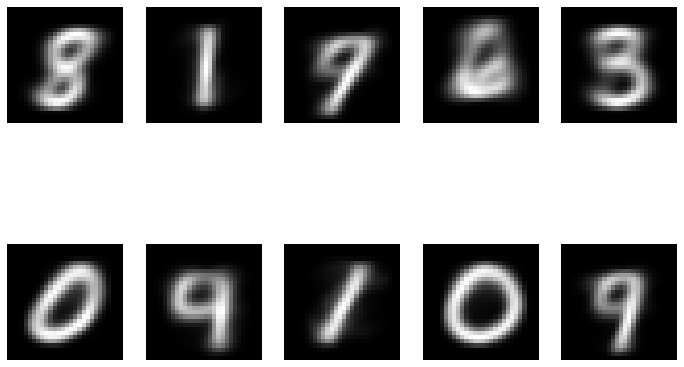

In [12]:
centroids = kmeans(X_mnist_train, k=10, max_iter=50)
plot_kmeans(centroids)

The input parameters of my function are X, k and max_iter, and the output are my centroids. Input k is needed because it determines the number of clusters I need to create, and thus affects the number of centroids I get as my output. Max iterations is also needed as an input because I perform an iterative optimization to update cluster centers, the centroids, to get better resulting classifications. And finally, X is my actual training data needed my functon divides and clusters together.

***Question 2c: Describe the k-means algorithm, highlighting similarities and differences from KNN. Compare the
reconstruction loss on the validation set for both k-means and PCA. Write no more than a third of a
page. (2 points)***

The k-means and KNN are both clustering algorithms however kNN is an unsupervised algorithm, whilst KNN is supervised. As a result, k-means realises on the dynamics of the features to make inferences on unseen data. We begin k-means by choosing k centroids and then we iteratively change the positions to the average location of the data points each point was assigned to. We continue doing this until the average location of the centroid doesn't change much. Similarly, KNN is affected by data surrounding data but the k represents the number of closest neighbours it looks for, from a classification point. Also, KNN stops optimization when all observations have been classified to a desired accuracy, k-means does not follow this performance measure.

Regarding the reconstruction loss on the validation set for both k-means and PCA, based on what I can see it appears as though k-means is able to reconstruct images more accurately because they are less pixelated. This may be due to the continuous nature of he k-means algorithm, it continues to find a centroid until it is the best it can be rather than the direct projection of points PCA carries out.

# Linear Classification (26 points)


***Question 3a: Implement the normal equation-based binary linear classifier lclass(examplesA, examplesB, testExample)
where the first two arguments are the set of samples from class A and class B respectively and the third
is the test. The function should return 0 if test is in A and 1 otherwise. It should, for simplicity, both
train and test in one function call. (5 points)***

In [13]:
def lclass(examplesA, examplesB, testExample):
  # train with A + B, use test Example to test

    labeled_A = np.hstack((examplesA, np.zeros((examplesA.shape[0], 1), dtype=examplesA.dtype)))
    labeled_B = np.hstack((examplesB, np.ones((examplesB.shape[0], 1), dtype=examplesA.dtype)))

    new_matrix = np.concatenate((labeled_A,labeled_B), axis=0)

    X = new_matrix[:,0:-1]
    y_train = new_matrix[:,-1:]

    W_opt = lineFit(X, y_train)

    testExample = augmentMatrix(testExample)
    yPredict = ((np.dot(testExample, W_opt) > 0.5).astype(np.int64))
    return yPredict

***Question 3b: Test this on all the samples in Iris, Setosa vs non-Setosa, etc and propose a simple analysis (text,
figure, table) of the result you find, but not longer than the third of a page. (6 points)***

In [14]:
# Performance Measure
def accuracy(Y_test, y_pred):
    
    accuracy = np.sum(Y_test == y_pred)
    accuracy /= Y_test.shape[0]
    
    return accuracy

def precision(Y_test, y_pred):
    
    mask = (Y_test == 1)
    
    precision = np.sum(Y_test[mask] == y_pred[mask])
    precision /= np.sum(mask.astype(np.float64))
    
    return precision

def true_positive(Y_test, y_pred):
    mask = (Y_test == 1)
    
    tp = (Y_test[mask] == y_pred[mask]).sum()
    
    return tp.item()

def true_negative(Y_test, y_pred):
    mask = (Y_test == 0) | (Y_test == -1)
    
    tn = (Y_test[mask] == y_pred[mask]).sum()
    
    return tn.item()

def false_negative(Y_test, y_pred):
    mask = (y_pred == 0) | (y_pred == -1)
    
    tn = (Y_test[mask] != y_pred[mask]).sum()
    
    return tn.item()

def false_positive(Y_test, y_pred):
    mask = (y_pred == 1)
    
    tn = (Y_test[mask] != y_pred[mask]).sum()
    
    return tn.item()

def plot_confusion_matrix(Y_test, y_pred):
    tp = true_positive(Y_test, y_pred)
    tn = true_negative(Y_test, y_pred)
    fp = false_positive(Y_test, y_pred)
    fn = false_negative(Y_test, y_pred)

    cf = np.array([[tn, fn], [fp, tp]])

    fig, ax = plt.subplots()

    ax.matshow(cf, cmap=plt.cm.Blues)

    for i in range(2):
        for j in range(2):
            c = cf[j,i]
            ax.text(i, j, str(c), va='center', ha='center')

    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.show()

Setosa vs None Setosa



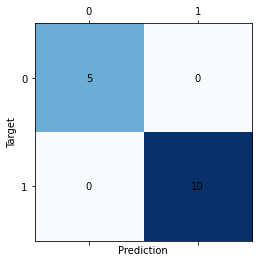

The precision is: 1.0
The accuracy is: 1.0

Versicolor vs None Versicolor



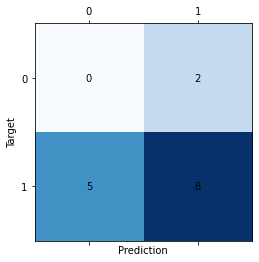

The precision is: 0.8
The accuracy is: 0.5333333333333333

Virginica vs None Virginica



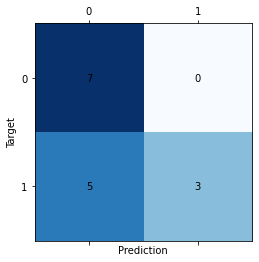

The precision is: 1.0
The accuracy is: 0.6666666666666666



In [15]:
def test_linear_classifier(X_iris_train, Y_iris_train, X_iris_val, Y_iris_val):
    # For Setosa vs None Setosa
    print('Setosa vs None Setosa\n')
    a_indexes = np.where(Y_iris_train == 0)
    class_A = X_iris_train[a_indexes]

    b_indexes = np.where(Y_iris_train != 0)
    class_B = X_iris_train[b_indexes]

    yPredict = lclass(class_A, class_B, X_iris_val)
    yActual = Y_iris_val.reshape(yPredict.shape)
    yActual = np.where(yActual==2, 1, yActual)

    plot_confusion_matrix(yActual, yPredict)

    prec = precision(yActual, yPredict)

    acc = accuracy(yActual, yPredict)

    print('The precision is: {}'.format(prec))
    print('The accuracy is: {}\n'.format(acc))


    # For Versicolor vs None Versicolor
    print('Versicolor vs None Versicolor\n')
    a_indexes = np.where(Y_iris_train == 1)
    class_A = X_iris_train[a_indexes]

    b_indexes = np.where(Y_iris_train != 1)
    class_B = X_iris_train[b_indexes]

    yPredict = lclass(class_A, class_B, X_iris_val)
    yActual = Y_iris_val.reshape(yPredict.shape)
    yActual = np.where(yActual==2, 1, yActual)

    plot_confusion_matrix(yActual, yPredict)

    prec = precision(yActual, yPredict)

    acc = accuracy(yActual, yPredict)

    print('The precision is: {}'.format(prec))
    print('The accuracy is: {}\n'.format(acc))

    # For Virginica vs None Virginica
    print('Virginica vs None Virginica\n')
    a_indexes = np.where(Y_iris_train == 2)
    class_A = X_iris_train[a_indexes]

    b_indexes = np.where(Y_iris_train != 2)
    class_B = X_iris_train[b_indexes]

    yPredict = lclass(class_A, class_B, X_iris_val)
    yActual = Y_iris_val.reshape(yPredict.shape)
    yActual = np.where(yActual==2, 0, yActual)

    plot_confusion_matrix(yActual, yPredict)

    prec = precision(yActual, yPredict)

    acc = accuracy(yActual, yPredict)

    print('The precision is: {}'.format(prec))
    print('The accuracy is: {}\n'.format(acc))

test_linear_classifier(X_iris_train, Y_iris_train, X_iris_val, Y_iris_val)


From the confusion matrices I have plotted I can see that my model is able to classify Setosa vs Non-Setosa irises with a 100% accuracy. Versicolor vs Non-Versicolor with an accuracy of 53% and precision of 80%, the disparity between accuracy and precision here leads me to believe they're many false-positives and miscalculations, but data points of the same group are being classified well. Similiarly, Virginica vs. Non Virginica also has a high precision but a lower accuracy, at 66%.

***Question 3c: Perform independent research how to do multi-class classification. Implement lmclass(examples,
class, testExample) that performs multi-class classification of the examples examples according
to the vector of labels class of the same size and tests it with testExample by returning the vector
probability of being class i. (10 points)***

In [16]:
# Using one vs. all + linear classification
def lmclass(examples, classes, testExample):
    result = []
    for label in np.unique(classes):
    probabilities = get_probabilities(examples, classes, label, testExample)
    result.append(probabilities)
    return np.array(result).T
    # the one with the highest probability

def get_probabilities(examples, classes, label, testExample):
    y = one_v_all(classes, label)
    W_opt = lineFit(examples, y)
    testExample = augmentMatrix(testExample)
    probabilities = np.dot(testExample, W_opt)
    return probabilities

def one_v_all(classes, label):
    if label == 0:
    classes = np.where(classes!=0, 5, classes)
    classes = np.where(classes==0, 1, classes)
    classes = np.where(classes==5, 0, classes)
    if label == 1:
    classes = np.where(classes!=1, 5, classes)
    classes = np.where(classes==5, 0, classes)
    if label == 2:
    classes = np.where(classes!=2, 5, classes)
    classes = np.where(classes==5, 0, classes)
    classes = np.where(classes==2, 1, classes)
    return classes

***Question 3d: Present findings applying multi-class classification on Iris dataset with 3 classes. You can include
figures and tables if needed. Write no longer than third of a page. (5 points)***

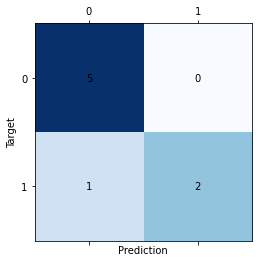

The precision is: 0.6666666666666666
The accuracy is: 0.8666666666666667



In [17]:
def test_probabilities(probabilities, Y_iris_val):
    yPredict = []
    yActual = Y_iris_val
    for x in probabilities:
    largest = np.where(x == np.amax(x))
    yPredict = np.append(yPredict, largest)

    plot_confusion_matrix(yActual, yPredict)

    prec = precision(yActual, yPredict)

    acc = accuracy(yActual, yPredict)

    print('The precision is: {}'.format(prec))
    print('The accuracy is: {}\n'.format(acc))

# test on iris dataset
examples = X_iris_train
labels = Y_iris_train
testExample = X_iris_val

probabilities = lmclass(examples, labels, testExample)
test_probabilities(probabilities, Y_iris_val)

By applying multi-class classification on Iris dataset with 3 classes, my model has a very high accuracy a 87% but a lower precision at 67%. This leads me to believe that it is finding it harder to group unseen data from similar classes together, but when data points are compleely different it performs much better at tha task.

# Non-linear Classification (25 points)


***Question 4a: Implement classification based on logistic regression using GD by implementing the gradient function
deLogistic(preds, X, Y) and optimizing using GD. preds are the prediction from the model, X are
the data and Y are the labels. (5 points)***

[1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1
 0 1 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1
 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0]
[01000] current loss: 0.12388691937019344
[02000] current loss: 0.06854319585769045
[03000] current loss: 0.04780184563034654
[04000] current loss: 0.03691440267410737
[05000] current loss: 0.030183961860789234
[06000] current loss: 0.025599159256366372
[07000] current loss: 0.02226822832713332
[08000] current loss: 0.019734647126908138
[09000] current loss: 0.017740196254965167
[10000] current loss: 0.016127682210178993


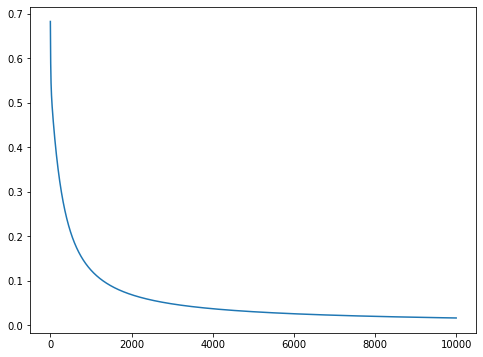

In [18]:
def trainLogisticClassifier(X, Y, W, loss_function, gradient, step_size, max_it):
    checkpoint_step = int(max_it / 10)

    best_loss = float('+inf')
    best_W = None

    history = []
    for it in range(max_it):
    z = np.dot(X, W)
    prediction = sigmoid(z)

    loss = cross_entropy_loss(prediction, Y)

    if loss < best_loss:
        best_w = W

    J = deLogistic(prediction, X, Y)
    W = W - step_size * J

    history.append(loss)

    if (it + 1) % checkpoint_step == 0:
        print('[{:05}] current loss: {}'.format(it+1, loss))

    return history, best_w

def cross_entropy_loss(preds, targets):
    cost = float('+inf')
    n = preds.shape[0]
    cost = (-1/n) * ( (targets.transpose() @ np.log(preds)) + (((1 - targets).transpose()) @ np.log(1 - preds)))
    return cost

def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))
  
def deLogistic(preds, X, Y):
    # preds are the prediction the model, X are the data and Y are the labels
    n = preds.shape[0]
    J = (1/n) * ((X.transpose()) @ (preds - Y))
    return J

def plot_loss(logs):
    fig = plt.figure(figsize=(8, 6))
    plt.plot(logs)
    plt.show()

# Doing a logistic regression to classify Setosa vs Non Setosa

X = X_iris_train
x_train = np.hstack((X, np.ones((X.shape[0],1))))

Y = Y_iris_train
y_train = Y
y_train = np.where(y_train==2, 1, y_train)
# y_train = np.where(y_train==0, -1, y_train)

print(y_train)

#X /= 16

W = np.random.uniform(-1,1,size=(x_train.shape[1]))

step_size = 1
max_it = 10000

history, W_opt = trainLogisticClassifier(x_train/16, y_train, W, cross_entropy_loss, deLogistic, step_size, max_it)

plot_loss(history)

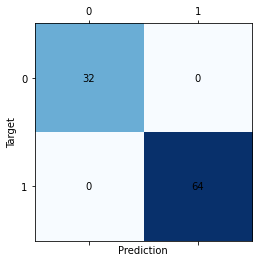

In [19]:
# Test the predictions with a confusion matrix

z = np.dot(x_train, W_opt)
preds = sigmoid(z)

bool_preds = preds > 0.5 # where predictions are 1, so are non-semotosa

y_pred_train = bool_preds.astype(int)

X = X_iris_val
x_test = np.hstack((X, np.ones((X.shape[0],1))))

z = np.dot(x_test, W_opt)
preds = sigmoid(z)

bool_preds = preds > 0.5
y_pred_test = bool_preds.astype(int)

plot_confusion_matrix(y_train, y_pred_train)

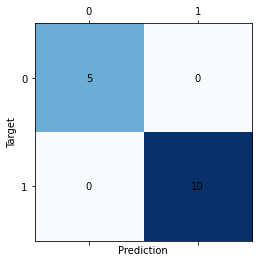

In [20]:
# Reconfigure the validation test set
Y = Y_iris_val
y_test = Y
y_test = np.where(y_test==2, 1, y_test)

plot_confusion_matrix(y_test, y_pred_test)

***Question b: Implement classification based on hinge loss (5 points) using GD by implementing the gradient function
deHinge(preds, W, x, y) and optimizing using GD. preds are the prediction from the model, W
describes the model parameters, x is the data and y represent the labels. (5 points)***

In [21]:
def trainHingeLossClassifier(X, Y, W, loss_function, gradien, step_size, max_it):
    checkpoint_step = int(max_it / 10)
    
    one = np.ones(Y.shape[0])
    best_w = np.zeros(W.shape)
    best_loss = float('+inf')
    
    history = []
    for it in range(max_it):
            
        z = np.dot(X, W)

        loss = hinge_loss(z, Y)

        if loss < best_loss:
            best_w = np.copy(W)

        J_w = deHinge(z, W, X, Y)

        W = W - step_size * J_w

        history.append(loss)

        if (it + 1) % checkpoint_step == 0:
            print('[{:05}] current loss: {}'.format(it, loss))
    
    return history, best_w

def sgn_predict(W, X):
    z = np.dot(X, W)
    out = np.sign(z)
    return out
    
def deHinge(preds, W, X, Y):
    length = len(preds)
    values = preds * Y
    result = np.zeros(X.shape)
    for i in range(length):
        for j in range(X.shape[1]):
            if values[i] < 1:
                result[i][j] = -Y[i] * X[i][j]
    result = result.sum(axis=0)/length
    return result

def hinge_loss(z, Y):
    length = len(z)
    loss = 1 - (z * Y)
    checkMax = np.vectorize(lambda element : max(0.0, element))
    return np.sum(checkMax(loss))/length


X = X_iris_train
x_train = np.hstack((X, np.ones((X.shape[0], 1))))

Y = Y_iris_train
y_train = Y
y_train = np.where(y_train==2, 1, y_train)

y_train[y_train == 0] = -1

W = np.zeros(x_train.shape[1])

C = 1.0 # this is the constan value for SVM?
step_size = 0.01
max_it = 1000

history, W_opt = trainHingeLossClassifier(x_train, y_train, W, hinge_loss, deHinge, step_size, max_it)

[00099] current loss: 0.03870221354166678
[00199] current loss: 0.011798849826388916
[00299] current loss: 0.008262890625000291
[00399] current loss: 0.005150542534722673
[00499] current loss: 0.0033893663194446712
[00599] current loss: 0.0028731662326389267
[00699] current loss: 0.002581282552083293
[00799] current loss: 0.0022893988715276584
[00899] current loss: 0.0019975151909720234
[00999] current loss: 0.0017057725694441667


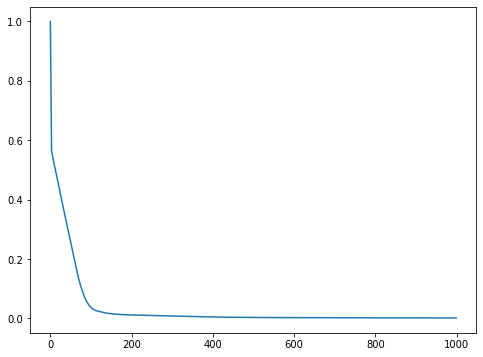

In [22]:
plot_loss(history)

***Question 4c: Implement kernel SVM function ksvm(kernel, x, y, xtest). The function takes as input a kernel,
training data and a set of test points. The function returns the set of support vectors along with the
predicted labels. You are allowed to use scipy optimization library to solve the quadratic problem of
SVM. (10 points)***

In [23]:
import scipy.optimize.minimize

# to get the svm need to compare the different points
def getPoints(kernel, X, valid=None):
    result = []
    if (valid is None):
        valid = X
    for num in valid:
        result.append(np.array([kernel(row, example) for row in X]))
    return augmentMatrix(np.array(result))

# range from 1 or -1
def getPredictions(kernel, X, xtest, W):
    xAug = getPoints(kernel, X, valid = xtest)
    yPred = np.matmul(xAug, W.x)
    yPred[yPred < 0] = -1
    yPred[yPred >= 0] = 1
    return yPred.astype(np.int64)

def getSV(xPoints, W, X):
    yT = np.matmul(xPoints, W.x)
    yT = np.round(yT, 5)
    supportIndex = np.where(np.logical_or(yT == -1, yT == 1))
    return X[supportIndex]

def gaussianKernel(x, z, sigma=10):
    n = x.shape[0]
    m = z.shape[0]
    xx = np.dot(np.sum(np.power(x, 2), 1).reshape(n, 1), np.ones((1, m)))
    zz = np.dot(np.sum(np.power(z, 2), 1).reshape(m, 1), np.ones((1, n)))
    return np.expr(-(xx + zz.T - 2 * np.dot(x, z.T)) / (2 * sigma ** 2))

# quadratic problem is solved using scipy.minimize.minimize

def ksvm(gaussianKernel, x, y, xtest):
    x, xtest = normalise(x), normalise(xtest)
    xPoints = getPoints(kernel, x)
    W = np.random.uniform(-1,1,size=(xPoints.shape[1]))
    constraint = lambda W: np.multiply(y, np.matmul(xPoints, W)) - 1
    dictContraint = {'type': 'ineq', 'fun': constraint}
    W = minimise(svmCot, W, method='SLSQP', constraint=[dictContraint])
    yPred = getPrediction(kernel, X, xtest, W)
    sv = getSV(xPoints, W, X)
    return sv, yPred

def normalise(xTrain):
    max = np.amax(xTrain, axis=0)
    max[max == 0] = 1
    return augmentMatrix(xTrain/max)

def svmCost(W):
    return (np.linalg.norm(W)/2)

def make_predictions(sv, sv_y):
    b = sv_y - np.sum(gaussianKernel(sv, sv) * alphas * sv_y, axis=0)
    b = np.sum(b) / b.size
    return b

# y = Y_iris_train
# X = X_iris_train
# xtest = X_iris_val

# sv, yPred = kvsm(gaussianKernel, X, Y, xtest)

# Neural network (25 points)


***Question 5a: Devise a three-layer neural network with n hidden states and sigmoid activations for classification.
Explain how many parameters this has in one sentence. (2 points)***



A three-layer neural network with n states and sigmoid activations for classification will have 3 layers between the input and output layer. I would have 5 parameters: inputLayerSize (of size n, where n are the number of features in X), hiddenLayerSize_1, hiddenLayerSize_2, hiddenLayerSize_3 (for the number of neurons in each hidden layer) and outputLayerSize.

***Question 5b: Provide the equation for the gradient using chain rule for the network in point a). (8 points)***



![Sketch](https://comp0169.s3.eu-west-2.amazonaws.com/WhatsApp+Image+2020-11-06+at+13.21.28.jpeg)


![Sketch](https://comp0169.s3.eu-west-2.amazonaws.com/original_5bda8101-8b3c-4985-96f3-cbbc810d67cd_PXL_20201106_130905632.jpg)

The final gradient is a vector combining all the component derivatives of the different weights.


***Question 5c: Implement the binary classifier nnclass(examplesA, examplesB, testExample) that is trained with
your implementation of (stochastic) GD and your gradient function using the network. (10 points)***

In [25]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x)*(1-sigmoid(x))

# Forward Operations
def forwardPass(X, W):
    z = []
    a = []
    layer_1_input = np.dot(X, w0)
    layer_1 = sigmoid(layer_1_input)
    z.append(layer_1_input)
    a.append(layer_1)
    layer_2_input = np.dot(X, w1)
    layer_2 = sigmoid(layer_2_input)
    z.append(layer_2_input)
    a.append(layer_2)
    layer_3_input = np.dot(X, w2)
    layer_3 = sigmoid(layer_3_input)
    z.append(layer_3_input)
    a.append(layer_3)
    out_layer_input = np.dot(layer_3, w3)
    out_layer_activated = sigmoid(out_layer_input)
    z.append(out_layer_input)
    a.append(out_layer_activated)
    return z, a

# Backwards propagation
def backwardPass(z, a, y_train, W, X):
    # compute the gradient w.r.t output of layer 3
    learning_rate = 0.001
    h_4 = y_train - a[3]
    delta_4 = -np.multiply(i_4, sigmoid_derivative(a[3]))
    dLdw4 = np.matmul(a[2].T, delta_4)

    h_3 = np.matmul(delta_4, W[3].T)
    delta_3 = np.multiply(h_3, sigmoid_derivative(a[2]))
    dLdw3 = np.matmul(a[1].T, delta_3)

    h_2 = np.matmul(h_3, W[2].T)
    delta_2 = np.multiply(h_2, sigmoid_derivative(a[1]))
    dLdw2 = np.matmul(a[0].T, delta_2)

    h_1 = np.matmul(delta_2, W[1].T)
    delta_1 = np.multiply(h_1, sigmoid_derivative(a[0]))
    dLdw1 = np.matmul(X.T, h_1)

    W[0] -= learning_rate * dError_W0
    W[1] -= learning_rate * dError_W1
    W[2] -= learning_rate * dError_W2
    W[3] -= learning_rate * dError_W3

    return W

# using quadratic cost function
def cost(X, yActual):
    yHat = forwardPass(X, weights, biases)
    J = 0.5*np.add((yActual-yHat)**2)
    return J

def cost_derivative(yHat, y):
    return yHat - y

def nnclass(examplesA, examplesB, testExample):
    a_labels = np.zeros((examplesA.shape[0], 1))
    b_labels = np.zeros((examplesB.shape[0], 1))
    y = np.vstack((a_labels, b_labels))
    x = np.vstack((examplesA, examplesB))
    x_train = add_bias(x)

    # n = 256 here
    INPUT_LAYER_SIZE = x_train.shape[1]
    HIDDEN_LAYER_SIZE_1 = 256
    HIDDEN_LAYER_SIZE_2 = 256
    HIDDEN_LAYER_SIZE_3 = 256
    N_CLASSES = examplesA.shape[0]
    OUTPUT_LAYER_SIZE = 2

    w0 = np.random.random((INPUT_LAYER_SIZE, HIDDEN_LAYER_SIZE_1)) * 2 - 1
    w1 = np.random.random((HIDDEN_LAYER_SIZE_1, HIDDEN_LAYER_SIZE_2)) * 2 - 1
    w2 = np.random.random((HIDDEN_LAYER_SIZE_2, HIDDEN_LAYER_SIZE_3)) * 2 - 1
    w3 = np.random.random((HIDDEN_LAYER_SIZE_3, N_CLASSES)) * 2 - 1
    W = [w0, w1, w2, w3]

    for i in range(0, 1000):
        batch = random.sample(range(0, x_train.shape[0]), x_train.shape[0]//200)
        x_batch = x_train[batch]
        z, a = forwardPass(x_batch, W)
        W = backwardPass(z, a, y[batch], W, x_batch)

    test_X = augmentMatrix(testExample)
    z_test, a_test = forwardPass(test_X, W)
    return np.where(a_test[-1] >= 0.5, 1, 0)


***Question 5d: Do an analysis how changes of n affect the accuracy, not longer than a third of a page. A table and /
or plot is welcome. Pay attention to table formatting and labels. (5 points)***

In [ ]:
def testnn():
  # Pass the single digit class for examples A and the rest for examples B
  # Do data preprocessing